### Day 4: Adding column to existing data frame and perform operations on it

#### Load packages

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

#### Load dataset

In [2]:
bikes = pd.read_csv('bikes.csv', sep=',', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

#### Check data

In [3]:
bikes.head(5)

Unnamed: 1  Berri1  CSC  Mais1  Mais2  Parc  PierDup  Rachel1  \
Date                                                                       
2013-01-01      00:00       0    0      1      0     6        0        1   
2013-01-02      00:00      69    0     13      0    18        0        2   
2013-01-03      00:00      69    2     21      6    22        1        0   
2013-01-04      00:00      80    0     22      4    16        0      125   
2013-01-05      00:00      52    4     19      3    12        0       97   

            Totem_Laurier  
Date                       
2013-01-01              0  
2013-01-02              0  
2013-01-03              0  
2013-01-04              0  
2013-01-05              0

#### Check the data type for each column in the dataframe

In [4]:
bikes.dtypes

Unnamed: 1       object
Berri1            int64
CSC               int64
Mais1             int64
Mais2             int64
Parc              int64
PierDup           int64
Rachel1           int64
Totem_Laurier     int64
dtype: object

### We will add a weekday column to the dataframe and then try to plot number of cyclists on everyday day of the week and see which day has maximum cyclists

In [5]:
bikes.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-09-09', '2013-09-10', '2013-09-11', '2013-09-12',
               '2013-09-13', '2013-09-14', '2013-09-15', '2013-09-16',
               '2013-09-17', '2013-09-18'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

#### We only have data for 261 days of the year. I need weekday here and can get this by:

In [6]:
bikes.index.weekday

Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
            ...
            0, 1, 2, 3, 4, 5, 6, 0, 1, 2],
           dtype='int64', name='Date', length=261)

#### Adding weekday column to the dataset

In [7]:
bikes.loc[:, 'weekday'] = bikes.index.weekday

bikes[:10]

Unnamed: 1  Berri1  CSC  Mais1  Mais2  Parc  PierDup  Rachel1  \
Date                                                                       
2013-01-01      00:00       0    0      1      0     6        0        1   
2013-01-02      00:00      69    0     13      0    18        0        2   
2013-01-03      00:00      69    2     21      6    22        1        0   
2013-01-04      00:00      80    0     22      4    16        0      125   
2013-01-05      00:00      52    4     19      3    12        0       97   
2013-01-06      00:00      37    0     23     46     8        0       47   
2013-01-07      00:00     159    0     81    211    60        0      200   
2013-01-08      00:00     327    0    156    393    66        0      335   
2013-01-09      00:00     332    0    155    446    84        0      366   
2013-01-10      00:00     391    0    232    516    88        0      463   

            Totem_Laurier  weekday  
Date                                
2013-01-01              0        1  
2013-01-02              0        2  
2013-01-03              0        3  
2013-01-04              0        4  
2013-01-05              0        5  
2013-01-06              0        6  
2013-01-07              0        0  
2013-01-08              0        1  
2013-01-09              0        2  
2013-01-10              0        3

### Group By

#### To get number of cyclists for each day of the week, I will use groupby and then sum()

In [8]:
counts = bikes.groupby('weekday').sum()

#### Display counts 

In [9]:
counts

Berri1    CSC  Mais1   Mais2   Parc  PierDup  Rachel1  Totem_Laurier
weekday                                                                      
0        106826  51646  68087  129982  69767    44500   119211          72883
1        117244  54656  76974  141217  74299    40679   123533          76559
2        120434  59604  79033  145860  80437    42564   125173          79501
3        115193  52340  76273  141424  73668    36349   120684          74540
4        105701  44252  71605  127526  64385    36850   118556          71426
5         75754  27226  45947   79743  35544    46149    97143          56438
6         74873  29181  40812   75746  37620    53812   100735          53798

#### To avoid confusion, change day indexes by names

In [10]:
counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [11]:
## Display counts
counts

Berri1    CSC  Mais1   Mais2   Parc  PierDup  Rachel1  \
Monday     106826  51646  68087  129982  69767    44500   119211   
Tuesday    117244  54656  76974  141217  74299    40679   123533   
Wednesday  120434  59604  79033  145860  80437    42564   125173   
Thursday   115193  52340  76273  141424  73668    36349   120684   
Friday     105701  44252  71605  127526  64385    36850   118556   
Saturday    75754  27226  45947   79743  35544    46149    97143   
Sunday      74873  29181  40812   75746  37620    53812   100735   

           Totem_Laurier  
Monday             72883  
Tuesday            76559  
Wednesday          79501  
Thursday           74540  
Friday             71426  
Saturday           56438  
Sunday             53798

#### Plot the results to see which day has maximum number of cyclists 

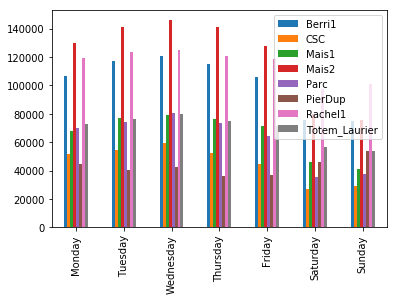

In [12]:
counts.plot(kind='bar')

#### Increasing the plot size to make it look better

In [13]:
plt.rcParams['figure.figsize'] = (15, 5)

#### Adding grid in the background and plotting it again

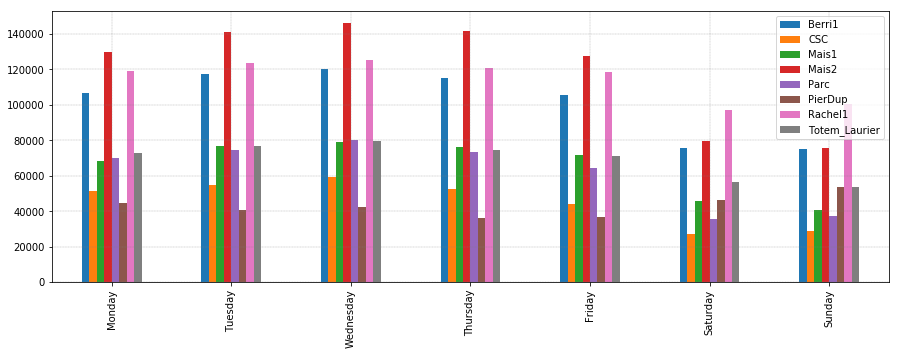

In [14]:
counts.plot(kind='bar').grid(color='gray', linestyle='--', linewidth=0.3)

#### We can see that for Mais2, the number of cyclists are maximum and on Wednesday